In [249]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split

df = pd.read_csv("Titanic-Dataset.csv")
print(df.columns)
scaler = StandardScaler()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


MSE: 0.21787709497206703
RMSE: 0.46677306581685607
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       106
           1       0.77      0.67      0.72        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

Optimization terminated successfully.
         Current function value: 0.445489
         Iterations 6


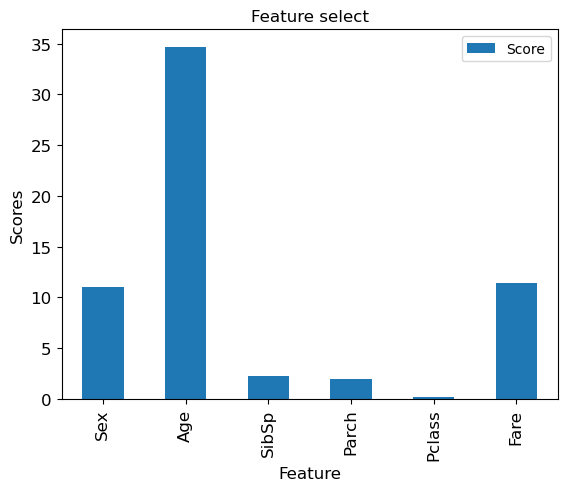

In [250]:
#Logistic Regression from scratch 
class LogisticRegression():
    def __init__(self, X, learning_rate = 0.1, num_iters = 10000):
        self.lr = learning_rate 
        self.num_iters = num_iters 
        
        # m for number training examples, n for number features 
        self.m, self.n = X.shape
        
    def train(self, X, y):
        self.weights = np.zeros((self.n, 1))
        self.bias = 0 
        self.costs = []
        for it in range(self.num_iters + 1):
            # calculate hypothesis 
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            
            # cost calculation
            c = -1/self.m * np.sum(y*np.log(y_predict) + (1 - y)*np.log(1 - y_predict))
            self.costs.append(c)
            dw = 1/self.m * np.dot(X.T, (y_predict - y))
            db = 1/self.m * np.sum(y_predict - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
        return self.weights, self.bias
            
    def predict(self, X):
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = y_predict > 0.5
        
        return y_predict_labels
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) 
    
    
if __name__ == '__main__':
    np.random.seed(1)
    
    df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

    X = scaler.fit_transform(df[['Sex', 'Age', 'SibSp', 'Parch', 'Pclass', 'Fare']].fillna(0).astype(float))
    y = df["Survived"].values[:,np.newaxis]
    
    #Training data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    
    logreg = LogisticRegression(X_train)
    w, b = logreg.train(X_train,y_train)
    y_predict = logreg.predict(X_test)
    
    #finding MSE and RMSE
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    print("MSE:", mse)
    print("RMSE:", rmse)

    
    #classification report
    print(classification_report(y_test, y_predict))
    
    
    #FINDING FEATURES 
    #adding p-value 
    X_train_constant = sm.add_constant(X_train)
    log_model = sm.Logit(y_train, X_train_constant)
    result = log_model.fit()
    p_values = result.pvalues
    scores = -np.log10(p_values)
    p_values = p_values[:6]  
    scores = scores[:6]
    
    feature_names = ['Sex', 'Age', 'SibSp', 'Parch', 'Pclass', 'Fare']
    feat_select = pd.DataFrame({
        'Feature': feature_names,
        'P_Value': p_values,
        'Score': scores
    })
    ax = feat_select[['Feature', 'Score']].plot(kind='bar', x='Feature', title="Feature select", legend=True, fontsize=12)
    ax.set_xlabel("Feature", fontsize=12)
    ax.set_ylabel("Scores", fontsize=12)
    plt.show()
    

Accuracy: 0.6871508379888268


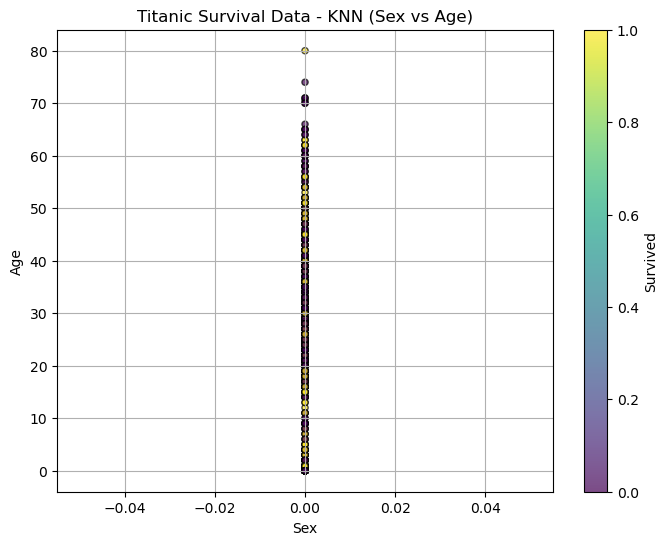

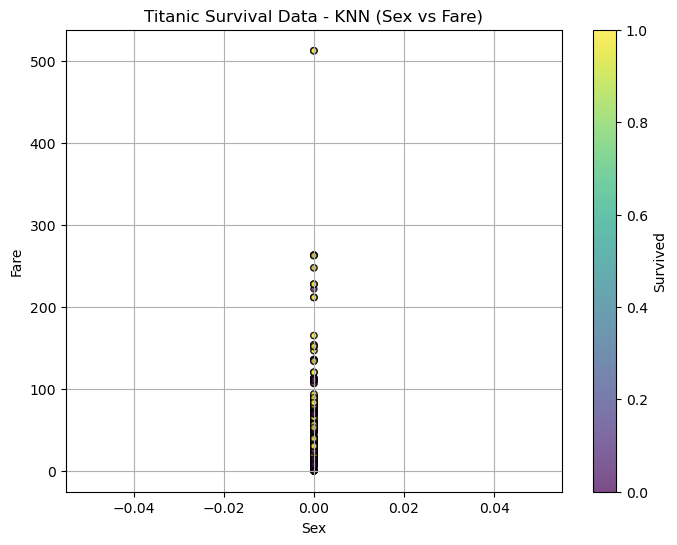

In [251]:
#KNN 
#creating euclidean distance 

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance 

class KNN:
    def __init__(self, k = 3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y 
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions 
    
    def _predict(self, x):
        distance = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        #getting the closest k 
        k_vals = np.argsort(distance)[:self.k]
        k_labels = [self.y_train[i] for i in k_vals]
        
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]
    
if __name__ == '__main__':
    df["Sex"] = df["Sex"].map({"male": 1, "female": 0})
    df.fillna(0, inplace=True)

    #features
    X = df[['Sex', 'Age', 'SibSp', 'Parch', 'Pclass', 'Fare']].values
    y = df["Survived"].values
    
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    knn = KNN(k=5)
    knn.fit(X_train, y_train)

    #predictions
    y_prediction = knn.predict(X_test)

    #accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    #data and decision boundries 
    def plot_data(X, y, title, xlabel, ylabel):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, alpha=0.7)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.colorbar(label='Survived')
        plt.grid(True)
        plt.show()

#bruh wont work bc it's continous vs binary. 
#gender vs age 
X_vis = df[['Sex', 'Age']].values
plot_data(X_vis, y, "Titanic Survival Data - KNN (Sex vs Age)", "Sex", "Age")

#gender vs fare 
X_vis = df[['Sex', 'Fare']].values
plot_data(X_vis, y, "Titanic Survival Data - KNN (Sex vs Fare)", "Sex", "Fare")

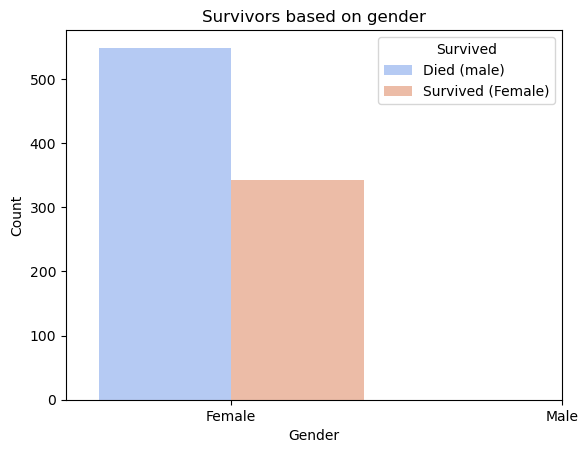

In [252]:
#BAR GRAPHS 
sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")
plt.title("Survivors based on gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ["Female", "Male"])
plt.legend(title="Survived", labels=["Died (male)", "Survived (Female)"])
plt.show()

In [253]:
# Decision tree
